## 0. Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from interpret_extension import show
from interpret_extension.glassbox import NAMClassifier

from sklearn.model_selection import train_test_split

## 1. Loading IRIS Dataset

Let's load the well-known IRIS Dataset:

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

However, let's convert it into a binary problem and separate between **X** and **y**:

In [3]:
iris['species'] = np.where(iris['species'] == 'Iris-setosa', 1, 0)

X = iris.drop('species', axis=1)
y = iris['species']

So, now, Iris-versicolor and Iris-virginica are the same class (**negative class**) and Iris-setosa is the **positive class**.

Finally, let's split it:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. NAM Model

NAM is a type of GAM (Generalized Additive Model) architecture based on neural networks. This model uses one neural network for each feature, making it additive and allowing it to be interpretable.

In [7]:
model = NAMClassifier(
            num_epochs=50, 
            num_learners=5, # Number of learners 
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

Let's fit it:

In [8]:
model.fit(X_train, y_train)

Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 0.721 |
Epoch(0):           Validation Loss: 0.651 | ACCURACY: 0.314:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 0.721 |
Epoch(1):           Validation Loss: 0.651 | ACCURACY: 0.314:   2%|▏         | 1/50 [00:00<00:08,  5.61it/s]
                    Training Loss: 0.676 |
Epoch(2):           Validation Loss: 0.491 | ACCURACY: 0.000:   2%|▏         | 1/50 [00:00<00:08,  5.61it/s]
                    Training Loss: 0.503 |
Epoch(3):           Validation Loss: 0.422 | ACCURACY: 0.010:   2%|▏         | 1/50 [00:00<00:08,  5.61it/s]
                    Training Loss: 0.439 |
Epoch(4):           Validation Loss: 0.403 | ACCURACY: 0.167:   2%|▏         | 1/50 [00:00<00:08,  5.61it/s]
                    Training Loss: 0.444 |
Epoch(4):           Validation Loss: 0.361 | ACCURACY: 0.255:   2%|▏         | 1/50 [00:00<00:08,  5.61it/s]
                    Training Loss: 0.444 |
Epoch(5):     

As we see, five different models have been trained (**num_learners**). The predictions will be the result of the mean of each one of them.

In [9]:
print("Number of models:", len(model.models))
model.models[0]

Number of models: 5


NAM(
  (dropout_layer): Dropout(p=0.05, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=64)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=46)
        (1): Linear(in_features=46, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, 

Let's predict:

In [13]:
pred = model.predict(X_test).ravel()
print("Accuracy: ", np.mean(pred == y_test))

Accuracy:  1.0


The original implementation had some interesting plots:

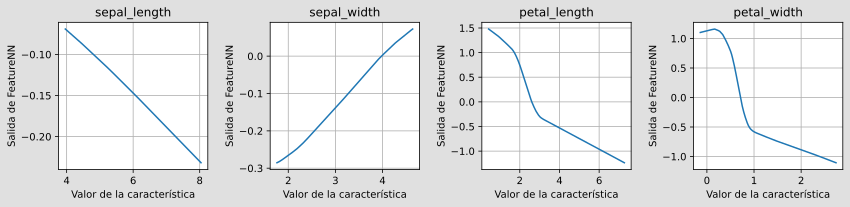

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.flatten()

for i in range(4):
    plot = model.plot(i)
    x = plot['x']
    y = plot['y']
    conf_int = plot['conf_int']    

    ax = axes[i]
    ax.plot(x, y)

    ax.set_xlabel("Valor de la característica")
    ax.set_ylabel("Salida de FeatureNN")
    ax.set_title(X_train.columns[i])
    ax.grid(True)
    
plt.tight_layout()
plt.show()

However, let's see each one of them with the InterpretML interface:

In [21]:
nam_global = model.explain_global()
show(nam_global)

<!-- http://127.0.0.1:7116/2844748770480/ -->

And of course the local explanations:

In [22]:
nam_local = model.explain_local(X_test, y_test)
show(nam_local)

<!-- http://127.0.0.1:7116/2844734416896/ -->